In [3]:
%load_ext pypath_magic
%pypath -a /home/vlad/projects/datamanagers/daily/

The pypath_magic extension is already loaded. To reload it, use:
  %reload_ext pypath_magic


UsageError: '/home/vlad/projects/datamanagers/daily' is already in the user path.


In [4]:
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm

# sklearn imports
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import xgboost as xgb


from daily.datamanager import DailyDataManager
import plotter.activate
from plotter import plot
import matplotlib.pyplot as plt
import seaborn as sns

2020-10-30 14:13:02.367 | INFO     | plotter.activate:<module>:24 - IPython detected, applying inline plotting and svg figure format.


In [5]:
ddm = DailyDataManager()
df = ddm.get_data('fx_rates')

In [6]:
rets = df.pct_change()
rets = rets.loc[rets.isnull().sum(1) == 0]
rets = rets.fillna(0)

In [7]:
x = rets.drop('SEK', axis=1)
y = rets['SEK']

In [12]:
fit_res = RandomForestRegressor().fit(x, y)

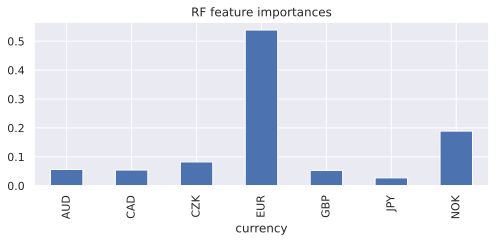

In [20]:
with plot(legend=False, title='RF feature importances') as p:
    pd.Series(fit_res.feature_importances_, x.columns).plot.bar(ax=p.ax())

### Main hyperparameters, sklearn tools to do cross-validation, Grid and Randomized search, loss metrics, etc